<a href="https://colab.research.google.com/github/flrain2/test/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

text classigication & sentence representation: https://www.edwith.org/deepnlp/lecture/29208?isDesc=false

code: https://www.tensorflow.org/tutorials/text/classify_text_with_bert#about_bert

bert논문분석: https://www.youtube.com/watch?v=IwtexRHoWG0

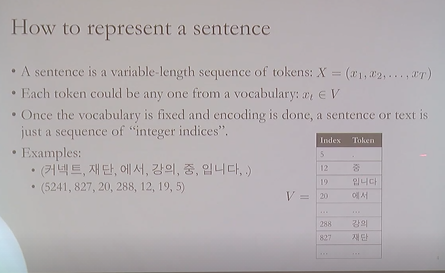

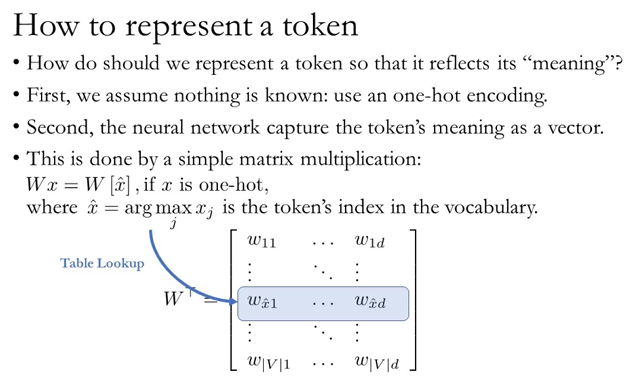

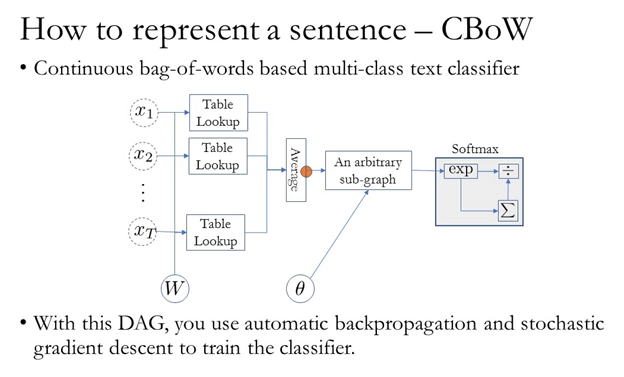

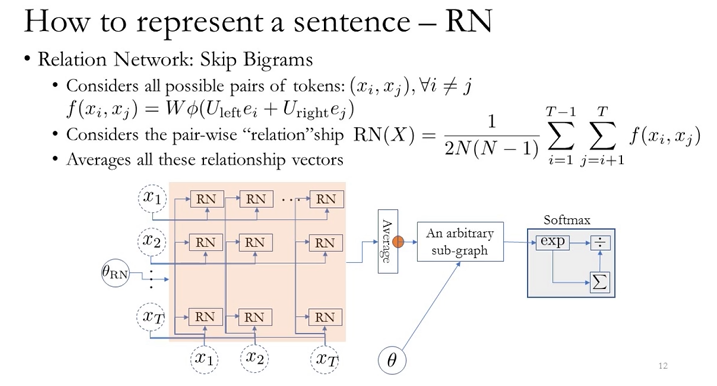

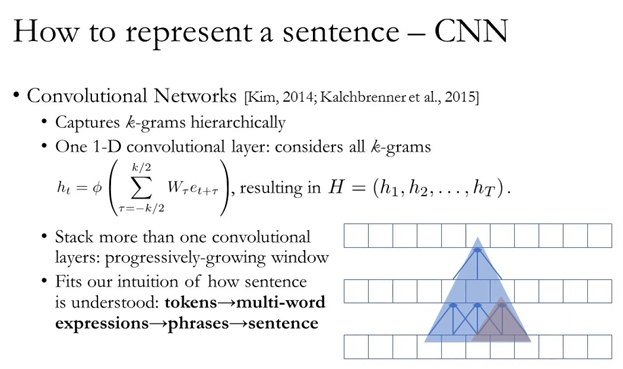

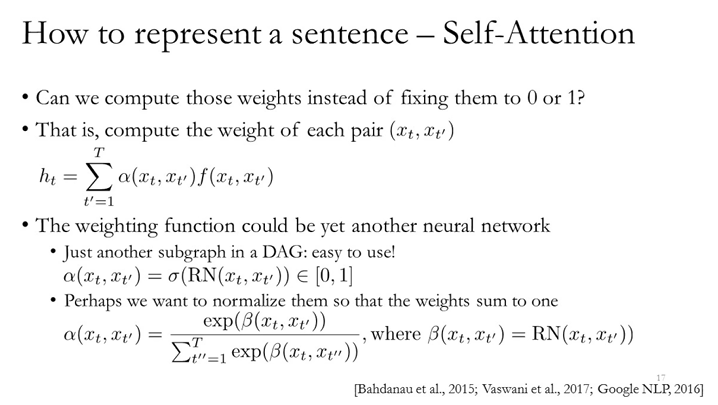

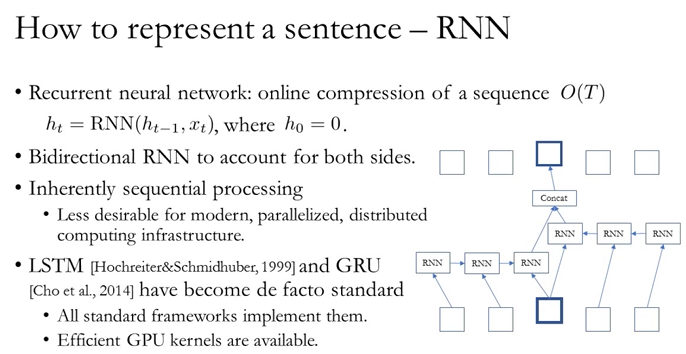

# Word Peice Model

[Tokenizing]

- 자연어를 어떤 단위로 살펴볼 것인가?

- 어절 단위 토크나이징

- 형태소 단위 토크나이징 (의미를 가지는 최소 단위)

- n-gram tokenizing

- WordPiece tokenizing (버트에서 적용된 기법)

https://lovit.github.io/nlp/2018/04/02/wpm/

토크나이징 (tokenizing) 은 문장을 토큰으로 나누는 과정입니다. 텍스트 데이터를 학습한 모델의 크기는 단어의 개수에 영향을 받습니다. 특히 Google neural machine translator (GNMT) 와 같은 Recurrent Neural Network (RNN) 기반 알고리즘들은 단어 개수에 비례하여 계산비용이 증가합니다. 그렇기 때문에 RNN 에 이용되는 vocabulary, word embedding 벡터의 종류가 제한됩니다. 하지만 vocabulary 의 개수가 제한되면 임베딩 벡터로 표현하지 못하는 단어가 생깁니다. 

학습 데이터를 이용하지 않으면서도 위의 결과를 이끌 수 있는 heuristics 이 있습니다. 

개막공연을 끝냈어 -> ['개막-' + '공연-' + '-을' + '끝-' + '-냈어']

‘공연-‘, ‘개막-‘, ‘-냈어’, ‘-났어’은 유닛이기 때문에 유닛이 아닌 subwords 보다 자주 등장할 가능성이 높습니다. 만약 ‘공연-‘의 빈도수와 ‘개막공연-‘의 빈도수가 같다면 ‘공연-‘이나 ‘개막-‘은 유닛으로 이용하지 않아도 됩니다. 어자피 세 유닛 모두 ‘개막공연’을 나타내기 위한 부분들이니까요.

그 전에 모든 단어의 시작에는 underbar, ‘_’ 를 붙입니다. 

- Word : Jet makers feud over seat width with big orders at stake
- Wordpieces: _J et _makers _fe ud _over _seat _width _with _big _orders _at _stake



# BERT: Bidirectional Encoder Representations from Transformer

모든 레이어의 왼쪽 및 오른쪽 컨텍스트를 공동으로 조정하여 레이블이없는 텍스트에서 깊은 양방향 표현을 사전 훈련하도록 설계되었습니다.

- Masked language model(MLM): bidirectional pre-training for language representations
- Next sentence prediction(NSP)

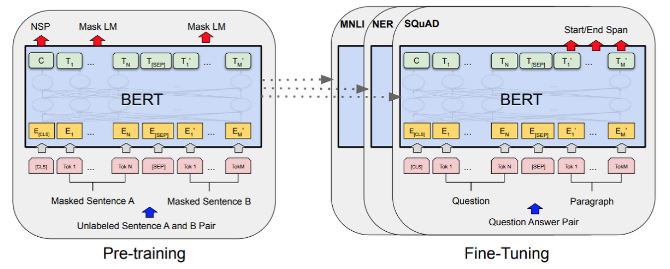

## BERT: model architecture
- Multi-layer bidirectional transgormer encoder
  - L: number of layers(Transformer block)
  - H: hidden size
  - A: number of self attention heads

- BERT base
  - L = 12, H = 768, A = 12
  - Total parameters = 110M
  - Same model size as OpenAI GPT

- BERT large
  - L = 24, H = 1,024, A = 16
  - Total parameters = 340M

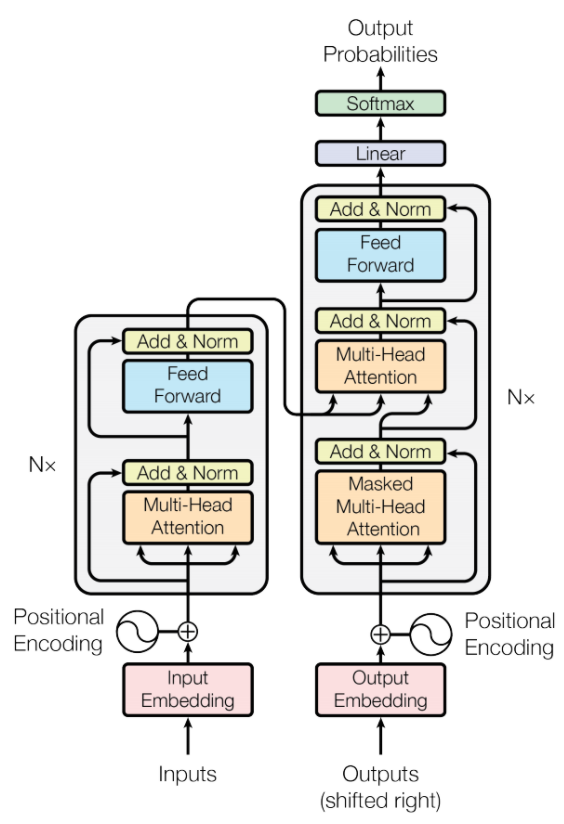

## BERT: input/ output representations
- BERT가 다양한 다운 스트림 작업을 처리 할 수 있도록 입력 표현은 단일 문장과 한 쌍의 문장을 모호하지 않게 표현할 수 있습니다.(ex. Q&A)
   - sentence : 실제 언어 문장이 아닌 연속 된 텍스트의 임의 범위
   - sequence : BERT에 대한 입력 토큰 시퀀스. 한 문장 또는 두 문장을 함께 묶을 수 있음
-------------------------------------

- To make BERT handle a variety of down-stream tasks, the input representation is able to unambiguously represent both a single sentence and a pair of sentences
  - sentence: an arbitrary span of contiguous text, rather than an actual linguistic sentence
  - sequence: the input token seqences to BERT, which may be a single sentence or two sentences packed together 

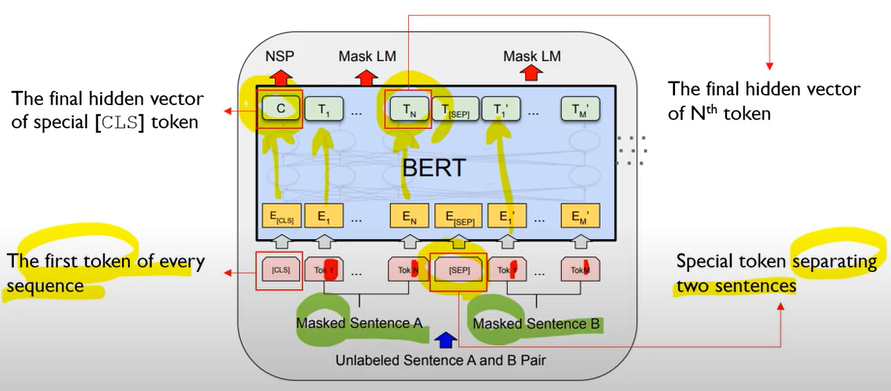

- input representation is the sum of
  1. Token embedding
  2. segment embedding
  3. position embedding

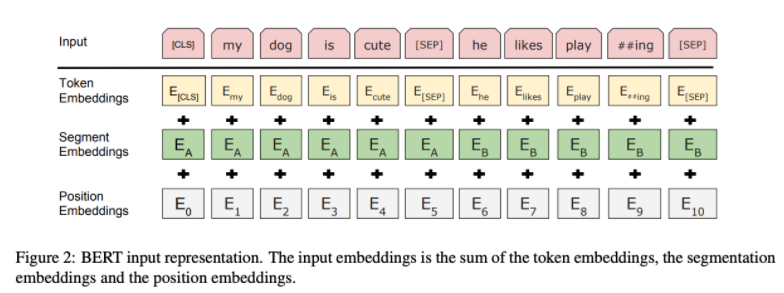

## Pre-training BERT
- Task1: Masked Language Model(MLM)
  - 15% 비율로 [mask] token으로 변경
  - Predict the masked words tarher than reconstructing the entire input in denoising encoder

[그림 출처]https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270

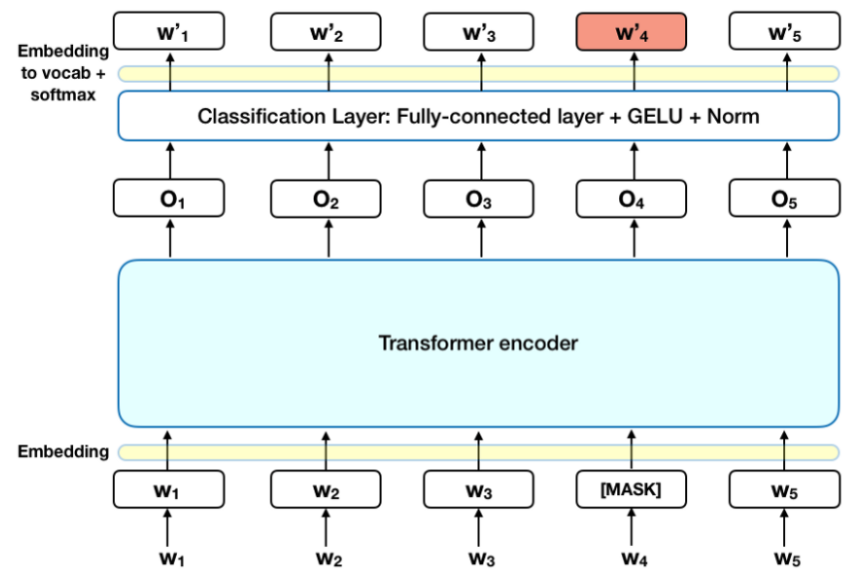

### Task1: MLM
- (caution) 핀 튜닝 중 마스크 토큰이 적용되지 않기 때문에 사전 훈련과 미세 조정 사이에 불일치가 발생합니다.
- (solution) i 번째 토큰이 선택되면 80%는 마스크 토큰, 10% 랜덤 토큰, 10%는 변경되지 않는 토큰으로 대체됩니다.
--------------------------
- (caution) A mismatch occurs between pre-training and fine-tuning, since the mask token does not apper during fin-tuning
- (solution) if the i-th token is chosen to be masked, it is replaced by the mask token 80% of the time, a random token 10% of the time, and unchanged 10% the time
  - (80%) my dog is hairy -> my dog is [mask]
  - (10%) my dog is hairy -> my dog is apple
  - (10%) my dog is hairy -> my dog is hairy

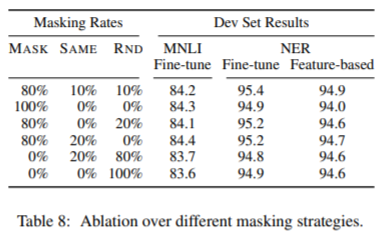

### Task2: Next Sentence Prediction(NSP)
- QA 및 NLI와 같은 많은 중요한 다운 스트림 작업은 언어 모델링에 의해 직접 캡처되지 않는 두 문장 간의 관계 이해를 기반으로합니다.
- 모든 단일 언어 말뭉치에서 사소하게 생성 될 수있는 이진화 된 다음 문장 예측 작업이 학습됩니다.
   - 시간의 50 %는 A 다음에 오는 실제 다음 문장입니다 (isNext)
   - 50 %의 경우 말뭉치에서 무작위 문장 (NotNext)
   - C는 다음 문장 예측에 사용됩니다.
- 단순함에도 불구하고. 이 작업에 대한 사전 교육은 QA와 NLI 모두에 매우 유용합니다. 

---------------------------------

- Many important downstream tasks such as QA and NLI are based on understanding the relationship between two sentences, which is not directly captured by language modeling
- A binarized next sentence prediction task that can be trivially generated from any monolingual corpus is trained
  - 50% of the time B is the actual next sentence that follows A (isNext)
  - 50% of the time it is a random sentence from the corpus (NotNext)
  - C is used for next sentence prediction
- Despite its simplicity. pre-training towards this task is very beneficial both QA and NLI

document 예제 = [S1, S2, S3,S4, S5, S6,S7, S8, S9]

[CLS] 문장 [sep] 문장/ label 

[CLS] S1 [sep] S2  / 1

[CLS] S1 [sep] S5  / 0

[CLS] S6 [sep] S2  / 0

[CLS] S8 [sep] S9  / 1

## Differences in pre-training model architectures

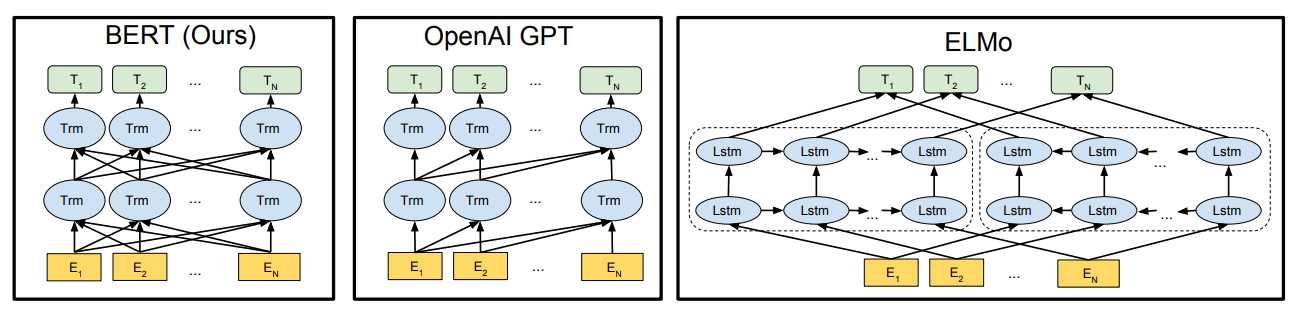

## Datasets for pre-training
- BooksCorpus(800M words)
- English Wikipedia(2,500M words)

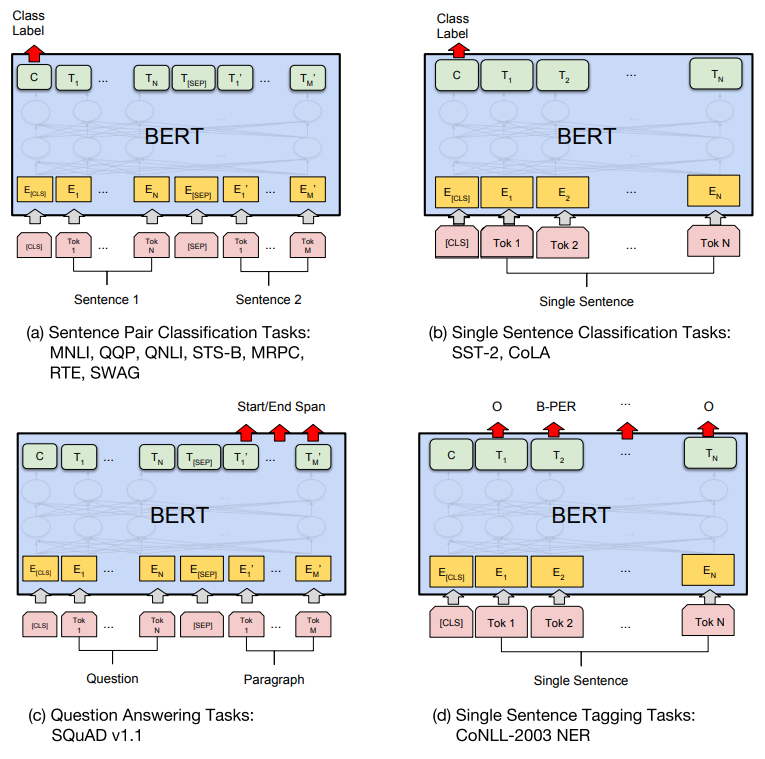

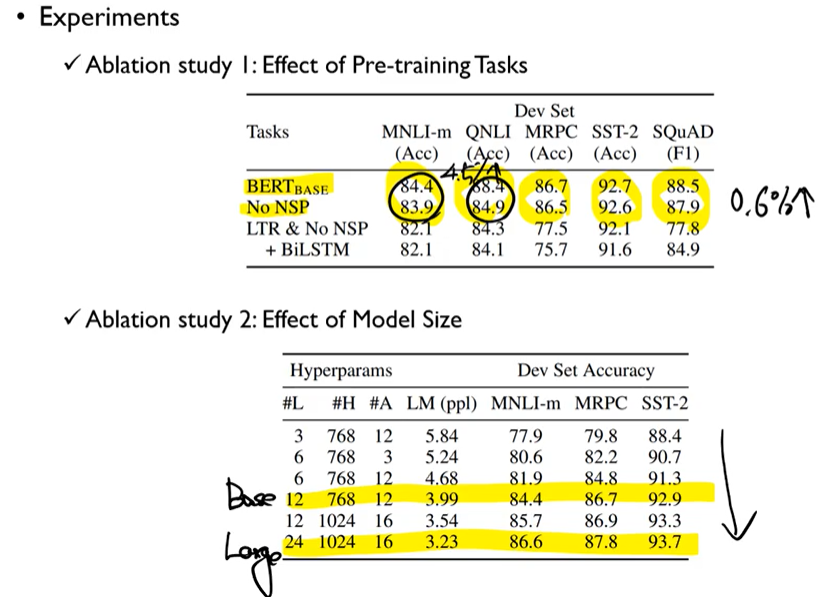

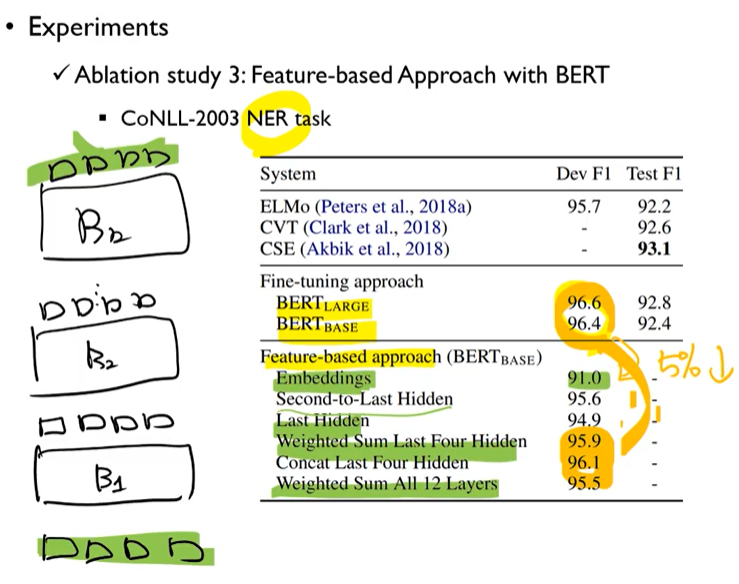

# context2Vec: https://www.programmersought.com/article/89423780917/

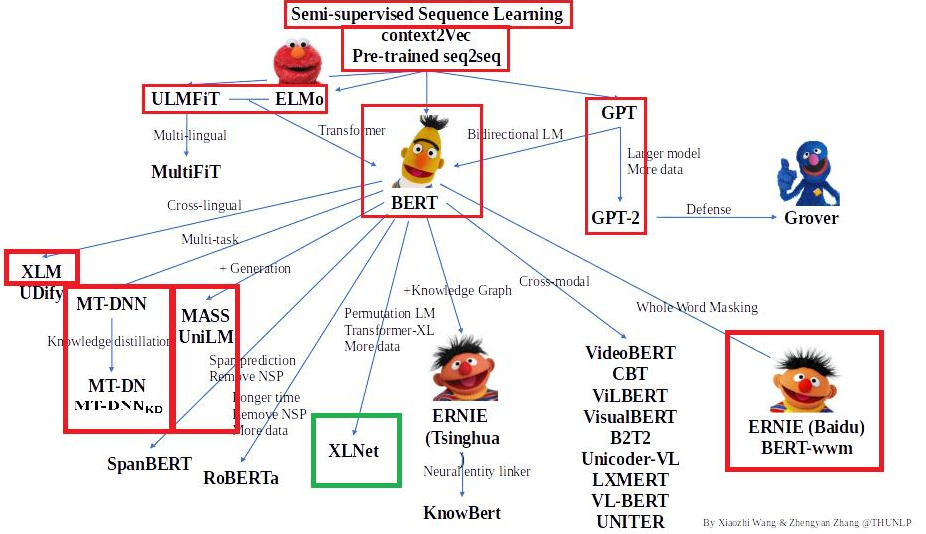

Seq2Seq
- Neural machine translation
- Encoder - Decoder 구조의 모델

Attention+Seq2Seq
- Neural machine translation
- Decoder가 Source sentence의 중요한 정보에 집중하게 하는 원리

Transformer
- Neural machine translation
- Self attention, Multi-head attention

GPT-1
- Task Agnostic: Pretraining + finetuning
- 언어 자체를 이해할 수 있는 좋은 representation을 학습

**BERT**
- Task Agnostic: Pretraining + finetuning
- 언어를 더 잘 이해하기 위해 Bridirectional하게 맥락을 파악
- 모든 NLP task에서 SOTA

GPT-2
- Task Agnostic: Zeroshot task transfer
- 언어를 정확히 학습했다면 Finetuning없이 Zeroshot만으로 좋은 성능을 내보는 원리
- 7가지 NLP task에서 SOTA

XLNet: BERT+GPT
- Task Agnostic
- BERT이후 큰 성능향상을 보인 첫 모델
- Factorization order를 고려하여 양방향 학습
- AR Formula를 통해 BERT한계 극복

RoBERTa
- Task Agnostic
- 가장 최적화된 BERT를 만들어보자

MASS
- Task Agnostic
- Encoder와 Decoder에 상반된 Masking
- Decoder: Encoder에서 masking된 단어 예측
- Encoder: Masking되지 않은 단어 깊은 이해
- Encoder와 Decoder의 joint training 장려

BART
- Task Agnostic
- Encoder에 다양한 noising 추가한 Text generation task에서  SOTA 달성

MT-DNN
- Task Agnostic
- Multitask learning을 통해 universal representation을 생성
- Pretrain 단계에서 multitask learning진행

T5
- Task Agnostic
- 모든 NLP task를 통합할 수 있도록 Text-to-Text 프레임워크를 사용용